<a href="https://colab.research.google.com/github/HeyamAl-Saidi/Mobile_Game/blob/main/Mobile_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the Library


In [ ]:
from google.colab import files
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

sns.set()


#Read the datset file from this link
link:https://www.kaggle.com/jyunyolin/mobile-game-retention-analysis-a-b-testing/data

In [ ]:
uploaded = files.upload()
df = pd.read_csv("cookie_cats.csv")


Saving cookie_cats.csv to cookie_cats.csv


The number of game rounds played by the player during the first 14 days after install.



In [ ]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

57702    49854
7912      2961
29417     2640
43671     2438
48188     2294
46344     2251
87007     2156
36933     2124
88328     2063
6536      2015
Name: sum_gamerounds, dtype: int64


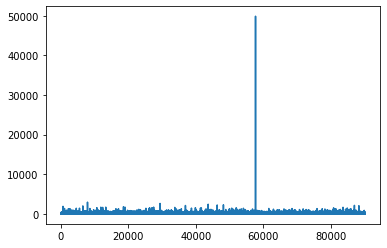

In [ ]:
plt.plot(df['sum_gamerounds'])
print(df['sum_gamerounds'].nlargest(10))

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

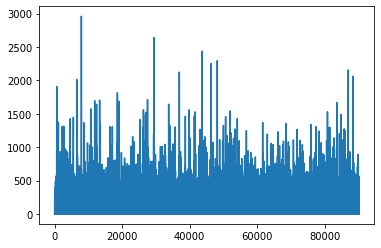

In [ ]:
df = df[df['sum_gamerounds'] < df['sum_gamerounds'].max()]
plt.plot(df['sum_gamerounds'])
df['sum_gamerounds'].describe()

In [ ]:
def ecdf(data):
    """Generate the ecdf data points from data"""
    
    # Get the length of the data
    n = len(data)
    # Sort the data point: x
    x = np.sort(data)
    # Generate an array of evenly divided points between 0 and 1
    y = np.arange(1, n+1) / n
    
    return x, y


Text(500, 0.9, '(500, 0.99)')

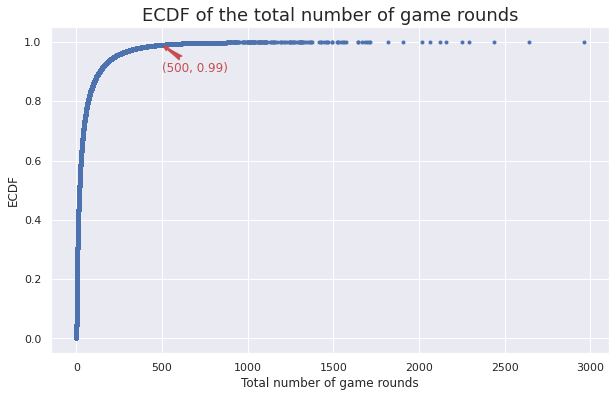

In [ ]:
# Generate the ecdf data points for plotting
rounds = df['sum_gamerounds']
x, y = ecdf(rounds)

# plot the ecdf
plt.figure(figsize=(10, 6))
_ = plt.plot(x, y, marker='.', linestyle='none')

# label the graph
xlabel = 'Total number of game rounds'
ylabel = 'ECDF'
title = 'ECDF of the total number of game rounds'
_ = plt.xlabel(xlabel)
_ = plt.ylabel(ylabel)
_ = plt.title(title, size=18)

# Annotate a data point for explanation
plt.annotate('(500, 0.99)', xy=(500, 0.99), xytext=(500, 0.9), color='r', arrowprops={'arrowstyle':'fancy', 'color':'r'})

In [ ]:
rounds_to_see = [0, 3, 5, 10, 20, 29, 30, 39, 40, 70, 100, 500]
prob_list = []
for game_round in rounds_to_see:
    prob_list.append(round(y[(x <= game_round).sum() - 1] * 100 , 2))

rounds_df = pd.DataFrame(prob_list, index=rounds_to_see, columns=['Percentage'])
print(rounds_df)

     Percentage
0          4.43
3         20.06
5         27.41
10        39.90
20        55.22
29        63.11
30        63.82
39        69.63
40        70.19
70        80.87
100       86.27
500       99.05


In [ ]:
rounds_diff = rounds_df - rounds_df.shift(1).fillna(0)
rounds_diff['Percentage'] = rounds_diff['Percentage'].map(lambda x: round(x, 2))
print(rounds_diff)

     Percentage
0          4.43
3         15.63
5          7.35
10        12.49
20        15.32
29         7.89
30         0.71
39         5.81
40         0.56
70        10.68
100        5.40
500       12.78


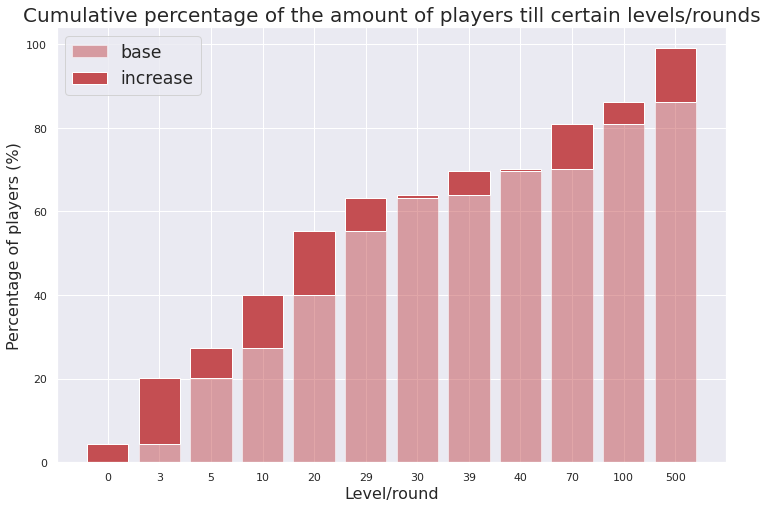

In [ ]:
# Create subplots for plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Get labels for bar charts 
labels = list(rounds_df.index.map(str))
base = rounds_df.shift(1).fillna(0)['Percentage'].values
increase = rounds_diff['Percentage'].values
# Plot the stacked bar chart
ax.bar(labels, base , label='base', color='r', alpha=0.5)
ax.bar(labels, increase, bottom=base, label='increase', color='r')

# Label the chart
#ax.bar_label(container=ax.containers[0],labels=rounds_df['Percentage'],label_type='center' , size=16)
#ax.bar_label(container=ax.containers[], labels=rounds_diff['Percentage'], label_type='center', size=12)
ax.set_title('Cumulative percentage of the amount of players till certain levels/rounds', size= 20)
ax.set_xlabel('Level/round', size=16)
ax.set_ylabel('Percentage of players (%)', size=16)
ax.legend(fontsize='x-large')

Text(35, 0.75, 'gate_30 surpasses gate_40')

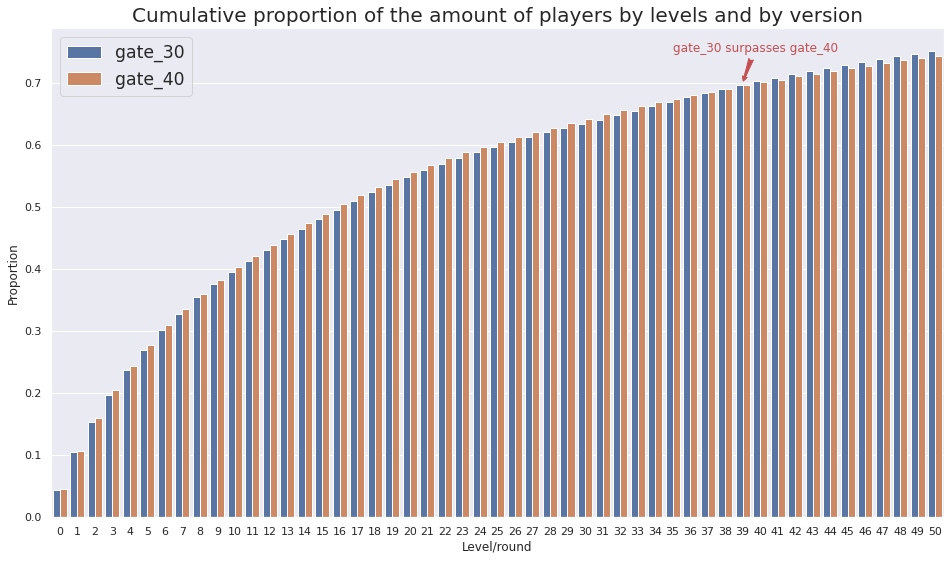

In [ ]:
# Generate a round counts frequency table by version
rounds_by_ver = df.groupby('version')['sum_gamerounds'].value_counts(normalize=True, sort=False)

# Calculate cumulative sum for each version
rounds_by_ver = rounds_by_ver.groupby(level=0).cumsum()

# Filter out levels later than 30 for the "gate_30" version and later than 40 for the other version
rounds_by_ver = rounds_by_ver.reset_index(name='proportion')
rounds_by_ver = rounds_by_ver.query('(version=="gate_30" & sum_gamerounds<=50) | (version=="gate_40" & sum_gamerounds<=50)')

# Plot a side-by-side bar chart
plt.figure(figsize=(16, 9))
sns.barplot(data=rounds_by_ver, x='sum_gamerounds', y='proportion', hue='version')

# Label the chart
plt.xlabel('Level/round')
plt.ylabel('Proportion')
plt.title('Cumulative proportion of the amount of players by levels and by version', size= 20)
plt.legend(fontsize='x-large')

# Annotate an interesting bar
plt.annotate('gate_30 surpasses gate_40', 
             xy=(39, 0.7), 
             xytext=(35, 0.75), 
             color='r', 
             arrowprops={'arrowstyle':'fancy', 'color':'r'})